In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Importing skfuzzy from sklearn package 

In [2]:
import skfuzzy as fuzz

# Importing silhouette score which act as a cluster validity index for unlabeled data

In [3]:
from sklearn.metrics import silhouette_score

# Importing adjusted_rand_score which act as a cluster validity index for labeled data

In [4]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Generate the data using normal distribution and plotting them

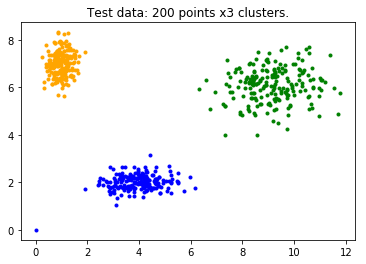

In [5]:
# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [9, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])

ax0.set_title('Test data: 200 points x3 clusters.')
plt.show()

# Call the Fuzzy c-means function and train the data. Here we vary the cluster center from 2 to 10

[[0.         4.39737132 3.88938856 ... 9.70492715 8.37170311 9.62984106]
 [0.         2.10733621 2.16823536 ... 6.38674297 6.15673989 6.9548983 ]]
[[0.21283067 0.2993182  0.23747484 ... 0.97854041 0.99368841 0.9654133 ]
 [0.78716933 0.7006818  0.76252516 ... 0.02145959 0.00631159 0.0345867 ]]
[[6.40693262e-01 9.89842263e-01 9.98706615e-01 ... 6.47885180e-03
  1.78154803e-02 1.55052837e-02]
 [1.04492784e-01 4.84512217e-03 5.44898568e-04 ... 9.89125065e-01
  9.70458973e-01 9.72822878e-01]
 [2.54813954e-01 5.31261469e-03 7.48486433e-04 ... 4.39608316e-03
  1.17255470e-02 1.16718385e-02]]
[[8.25728226e-02 4.28494617e-03 4.38055971e-04 ... 9.20855898e-01
  4.77195339e-03 7.39431947e-01]
 [1.06734047e-01 6.53773242e-03 6.63438126e-04 ... 7.48000444e-02
  9.94637494e-01 2.43067019e-01]
 [2.29036643e-01 5.79301675e-03 7.38497933e-04 ... 1.76057270e-03
  2.35107730e-04 7.53335205e-03]
 [5.81656488e-01 9.83384305e-01 9.98160008e-01 ... 2.58348452e-03
  3.55444530e-04 9.96768198e-03]]
[[1.1748918

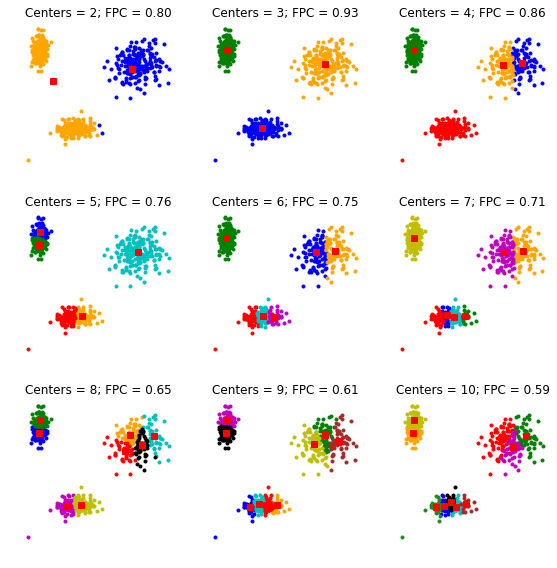

In [6]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

print (alldata)

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    print (u)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
plt.show()

# Plot the Fuzzy partition Coefficient (FPC) by varying the number of the centers. 

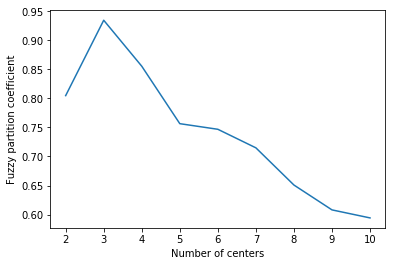

In [7]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()